## Problem Statement 

#### Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.
#### About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities

#### Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the dcrest need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on  most.



### Data Dictionary 
* **country** - Name of the country
* **child_mort** - Child mortality rate (number of deaths per 1,000 live births)
* **exports** - Exports as a percentage of GDP
* **health** - Health expenditure as a percentage of GDP
* **imports** - Imports as a percentage of GDP
* **income** - Net income per capita in USD	
* **inflation** - Inflation rate (annual percentage)	
* **life_expec** - Life expectancy in years	
* **total_fer** - Total fertility rate (average number of children per woman)	
* **gdpp** - GDP per capita in USD

This dataset provides socio-economic and health indicators that help categorize countries based on their development levels. 

The variables indicate economic strength (income, gdpp, exports, imports), health and demographic conditions (child_mort, life_expec, health, total_fer), and financial stability (inflation).

In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the data 
df = pd.read_csv('Country-data.csv')
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [5]:
#Set country as index
df.set_index('country',inplace=True)

In [6]:
df.head()

child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  
country                                            
Afghanistan                56.2       5.82    553  
Albania                    76.3       1.65   4090  
Algeria                    76.5       2.89   4460  
Angola                     60.1       6.16   3530  
Antigua and Barbuda        76.8       2.13  12200

In [7]:
# Shape of the data 
print(f'No.of rows: {df.shape[0]}')
print(f'No.of columns: {df.shape[1]}')

No.of rows: 167
No.of columns: 9


In [8]:
# Dataset information 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


##### Summary 
* No null values 
* All columns have been assigned the correct data types.

### Descriptive Statistics

In [11]:
df.describe().T

count          mean           std       min       25%      50%  \
child_mort  167.0     38.270060     40.328931    2.6000     8.250    19.30   
exports     167.0     41.108976     27.412010    0.1090    23.800    35.00   
health      167.0      6.815689      2.746837    1.8100     4.920     6.32   
imports     167.0     46.890215     24.209589    0.0659    30.200    43.30   
income      167.0  17144.688623  19278.067698  609.0000  3355.000  9960.00   
inflation   167.0      7.781832     10.570704   -4.2100     1.810     5.39   
life_expec  167.0     70.555689      8.893172   32.1000    65.300    73.10   
total_fer   167.0      2.947964      1.513848    1.1500     1.795     2.41   
gdpp        167.0  12964.155689  18328.704809  231.0000  1330.000  4660.00   

                 75%        max  
child_mort     62.10     208.00  
exports        51.35     200.00  
health          8.60      17.90  
imports        58.75     174.00  
income      22800.00  125000.00  
inflation      10.75     104.00  
life_expec     76.80      82.80  
total_fer       3.88       7.49  
gdpp        14050.00  105000.00

Key insights from descriptive statistics:

* Child Mortality (child_mort): Ranges from 2.6 to 208, with a high mean (38.27) and standard deviation (40.33), indicating significant disparity in child mortality rates across countries.
* Exports (% of GDP): Varies from 0.109% to 200%, suggesting a wide economic gap in trade.
* Health Expenditure (% of GDP): Shows a moderate mean (6.82%) with values ranging from 1.81% to 17.9%.
* Imports (% of GDP): Similar to exports, varies significantly (0.0659% to 174%).
* Income (per capita in USD): Skews heavily, with a maximum of $125,000 and a minimum of $609, indicating stark economic differences.
* Inflation (%): Has an extreme range (-4.21% to 104%), showing economic instability in some countries.
* Life Expectancy (years): Ranges from 32.1 to 82.8, reflecting varying levels of healthcare and living conditions.
* Total Fertility Rate (children per woman): Median of 2.41, but some countries have a very high fertility rate (up to 7.49).
* GDP per capita (gdpp in USD): Skewed distribution with a minimum of $231 and a maximum of $105,000, again highlighting significant economic inequality.

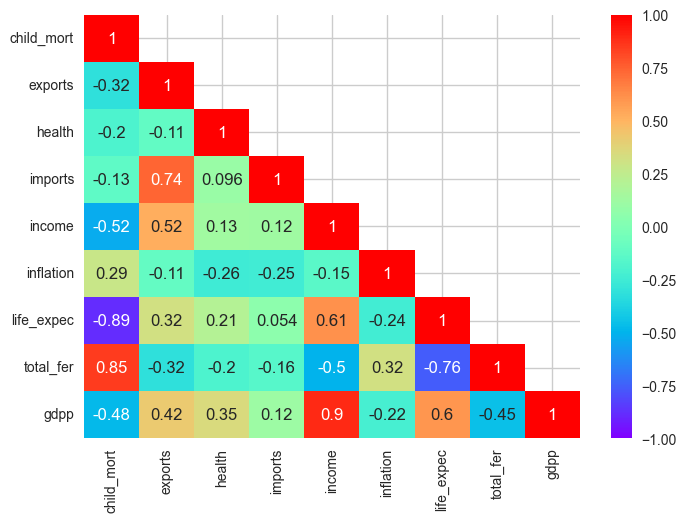

In [13]:
#Relationship between the columns
sns.heatmap(df.corr(), vmax= 1, vmin = -1 ,annot =True,cmap = 'rainbow', mask = np.triu(df.corr(),k=1))
plt.show()

#### Summary

Strong Correlations:

* Child Mortality & Life Expectancy ----> Highly Negative (-0.89) ----> Countries with high child mortality rates tend to have significantly lower life expectancy.
* GDP per Capita & Income ----> Highly Positive (0.90) ----> As expected, GDP per capita and income are strongly correlated.
* Total Fertility Rate & Child Mortality ----> Highly Positive (0.85) ----> Higher fertility rates are associated with higher child mortality, possibly due to inadequate healthcare.
* Income & Life Expectancy ----> Strong Positive (0.61) ----> Wealthier countries tend to have higher life expectancy, likely due to better healthcare and living conditions.

Weak Correlations:

* Inflation & GDP per Capita ----> Weak Negative (-0.22) ----> No strong relationship between inflation and GDP per capita.
* Health Expenditure & GDP per Capita ----> Moderate Positive (0.35) ----> Higher GDP per capita is weakly associated with increased healthcare spending.

Conclusion:
* Economic Indicators (GDP per capita, Income) are strongly linked to Life Expectancy and Child Mortality.
* High Fertility and Child Mortality rates tend to be characteristics of underdeveloped countries.
* Countries with higher trade openness (exports & imports) tend to have better economic stability.
* Inflation does not have a strong correlation with most development indicators.

### Data Visualization 

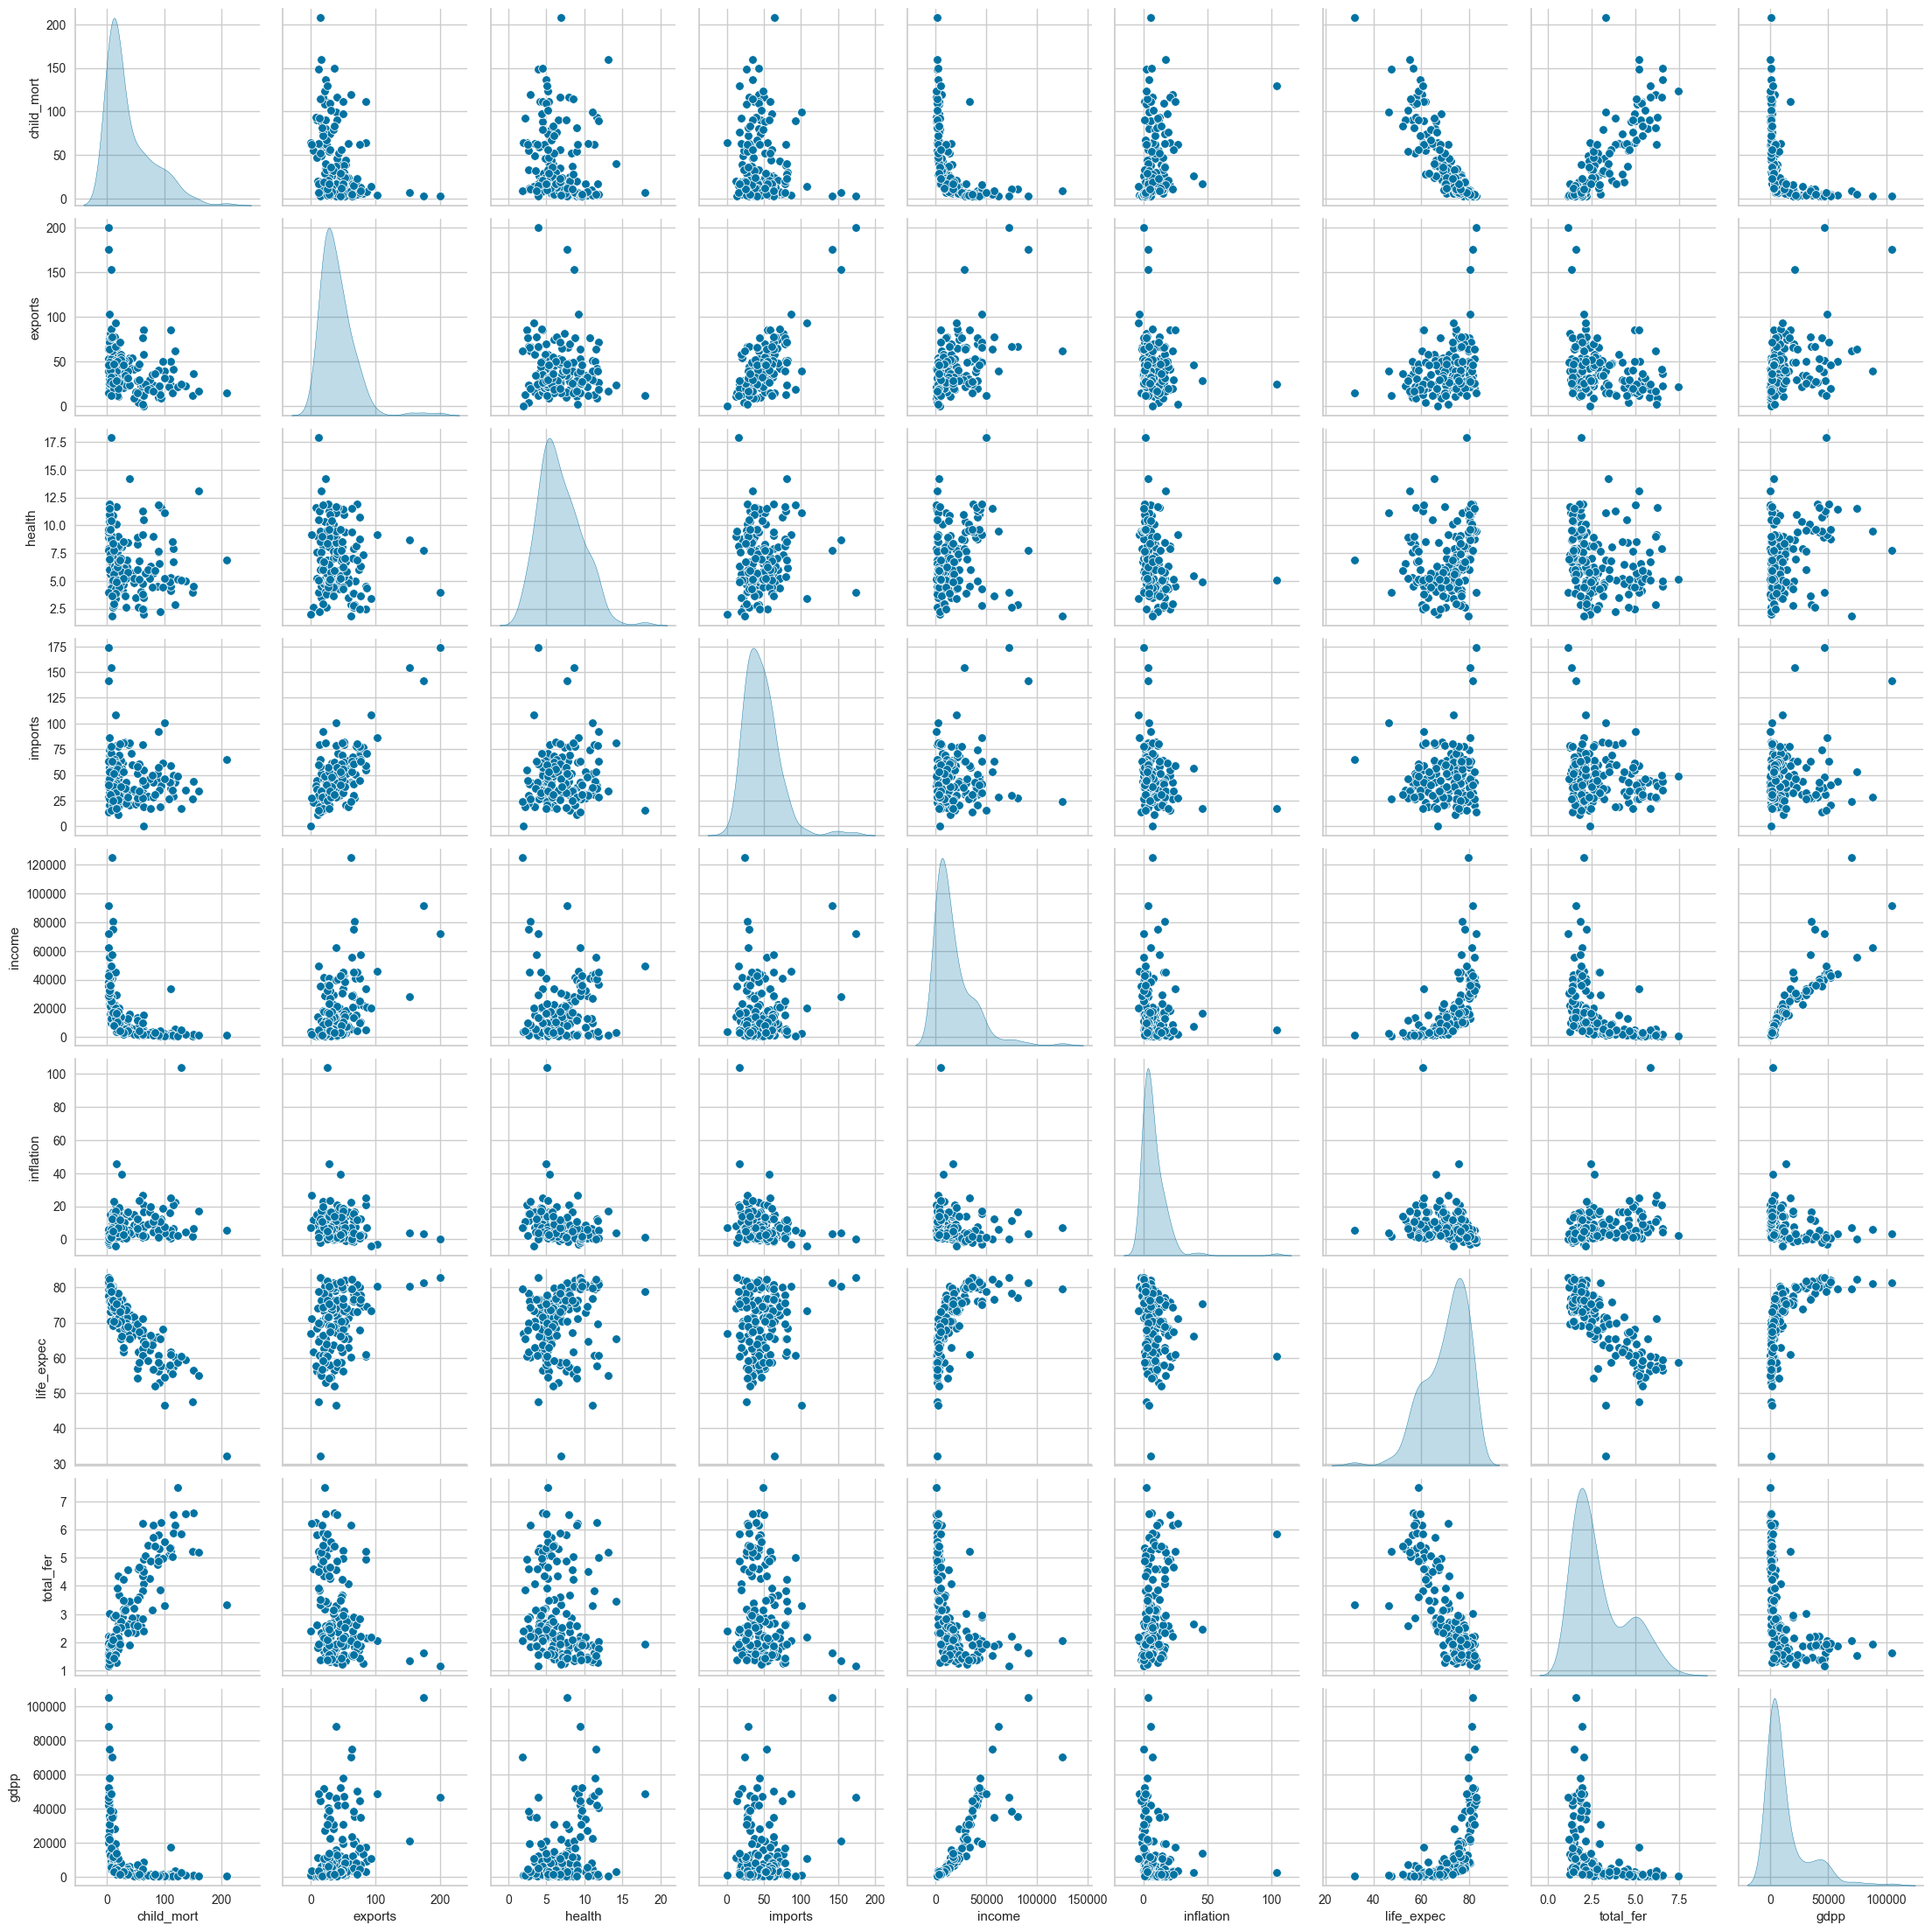

In [16]:
sns.pairplot(data = df , diag_kind = 'kde')
plt.show()

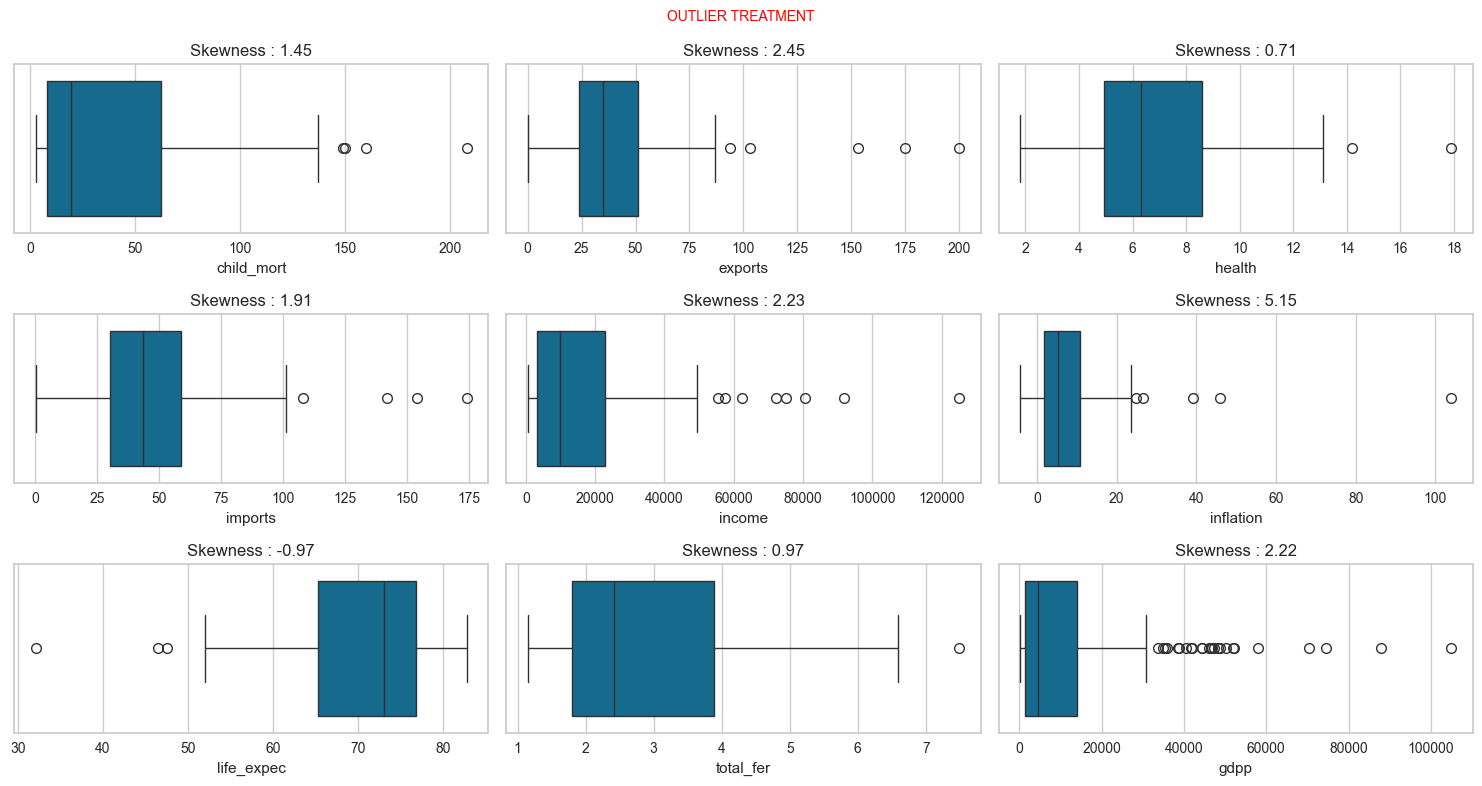

In [17]:
# Outliers visuvalization and skewness of the data
t = 1
plt.figure(figsize = (15,8))
plt.suptitle('OUTLIER TREATMENT',color = 'red',size = 10)
for i in df.columns:
    plt.subplot(3,3,t)
    sns.boxplot(df,x = i)
    plt.title(f'Skewness : {round(df[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

#### Summary
* Inflation (5.15), Exports (2.45), Income (2.23),GDP per capita (2.22) ----> Highly skewed, indicating that a few countries have exceptionally high values.
* Child Mortality (1.45), Imports (1.91) ---> Moderately skewed.
* Life Expectancy (-0.97), Total Fertility (0.97) ----> relatively normal.

### Data Preprocessing 

In [20]:
# Checking for duplicates 
df.duplicated().sum()

0

There are no duplicate records present in the dataset

In [22]:
# Checking for null values 
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no null values

In [24]:
# Outlier Treatment - Capping outliers by using a whisker length of 2 × IQR
for i in df.columns:
    q1,q3 = np.quantile(df[i],[0.25,0.75])
    iqr = q3-q1
    ul,ll = q3+2*iqr , q1-2*iqr
    df[i] = df[i].apply(lambda x:ul if x>ul else ll if x<ll else x)

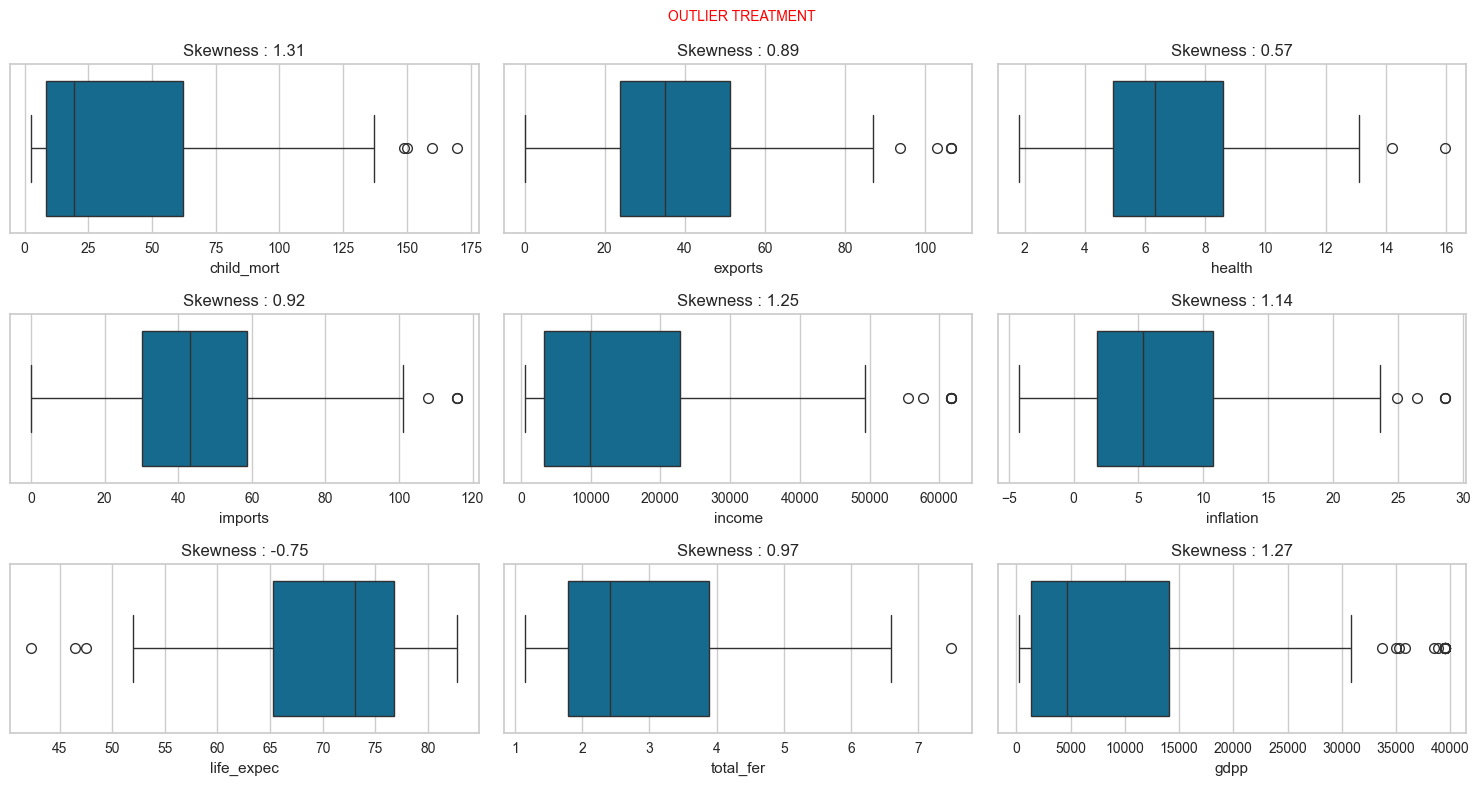

In [25]:
## Rechecking the outliers and skewness 
t = 1
plt.figure(figsize = (15,8))
plt.suptitle('OUTLIER TREATMENT',color = 'red',size = 10)
for i in df.columns:
    plt.subplot(3,3,t)
    sns.boxplot(df,x = i)
    plt.title(f'Skewness : {round(df[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

Scaling is essential for PCA and K-Means because PCA relies on variance, and K-Means uses Euclidean distance—both can be biased by features with larger magnitudes. Standardizing ensures all features contribute equally, leading to better clustering and meaningful principal components.

In [27]:
#Scaling the data
ss=StandardScaler()
df_s =pd.DataFrame(ss.fit_transform(df),columns=df.columns)
df_s.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.325807 -1.350898  0.287879 -0.059395 -0.908259   0.327015   -1.669872   
1   -0.545011 -0.536547 -0.094264  0.115438 -0.394747  -0.384140    0.658280   
2   -0.273031 -0.066034 -0.977272 -0.697302 -0.211439   1.283842    0.681446   
3    2.057866  1.015243 -1.467008 -0.153900 -0.643479   2.188949   -1.218141   
4   -0.705149  0.255182 -0.287190  0.602137  0.171226  -0.822326    0.716194   

   total_fer      gdpp  
0   1.902882 -0.800533  
1  -0.859973 -0.534220  
2  -0.038404 -0.506362  
3   2.128151 -0.576385  
4  -0.541946  0.076410

### Dimension Reduction 

In [29]:
#Reduce the dataset with PCA
pca=PCA(n_components=9)
pca.fit(df_s)

PCA(n_components=9)

In [30]:
#Explained Variance Ratio ---> Shows how much variance each principal component captures individually
print(f'Explained variance ratio is {pca.explained_variance_ratio_}')
# Cumulative Explained Variance ---> Helps decide the optimal number of components by showing the total variance retained.
print(f'Cumulative explained variance is {np.cumsum(pca.explained_variance_ratio_)}')

Explained variance ratio is [0.48163025 0.16586924 0.13639048 0.09910154 0.0655671  0.02171641
 0.0164242  0.0094028  0.00389797]
Cumulative explained variance is [0.48163025 0.6474995  0.78388998 0.88299152 0.94855862 0.97027503
 0.98669923 0.99610203 1.        ]


Choosing the number of principal components that explain at least 95% of the variance ensures optimal dimensionality reduction while retaining most of the dataset’s information. 
Here, 5 principal components will be used, explaining approximately 94.8% (~95%) of the total variance.

In [32]:
pca_final = PCA(n_components=5)
pca_data =pd.DataFrame(pca_final.fit_transform(df_s),columns = ['PC1','PC2','PC3','PC4','PC5'],index = df.index)
pca_data.head(3)

PC1       PC2       PC3       PC4       PC5
country                                                      
Afghanistan -3.099217 -0.232689 -0.972447  0.787536 -0.009905
Albania      0.427427 -0.285346 -0.242571 -1.377388  0.114011
Algeria     -0.411658 -0.526613  1.634043 -0.613283  0.459962

### Implementation of Kmeans Clustering on PCA data - Finding Optimal K-value

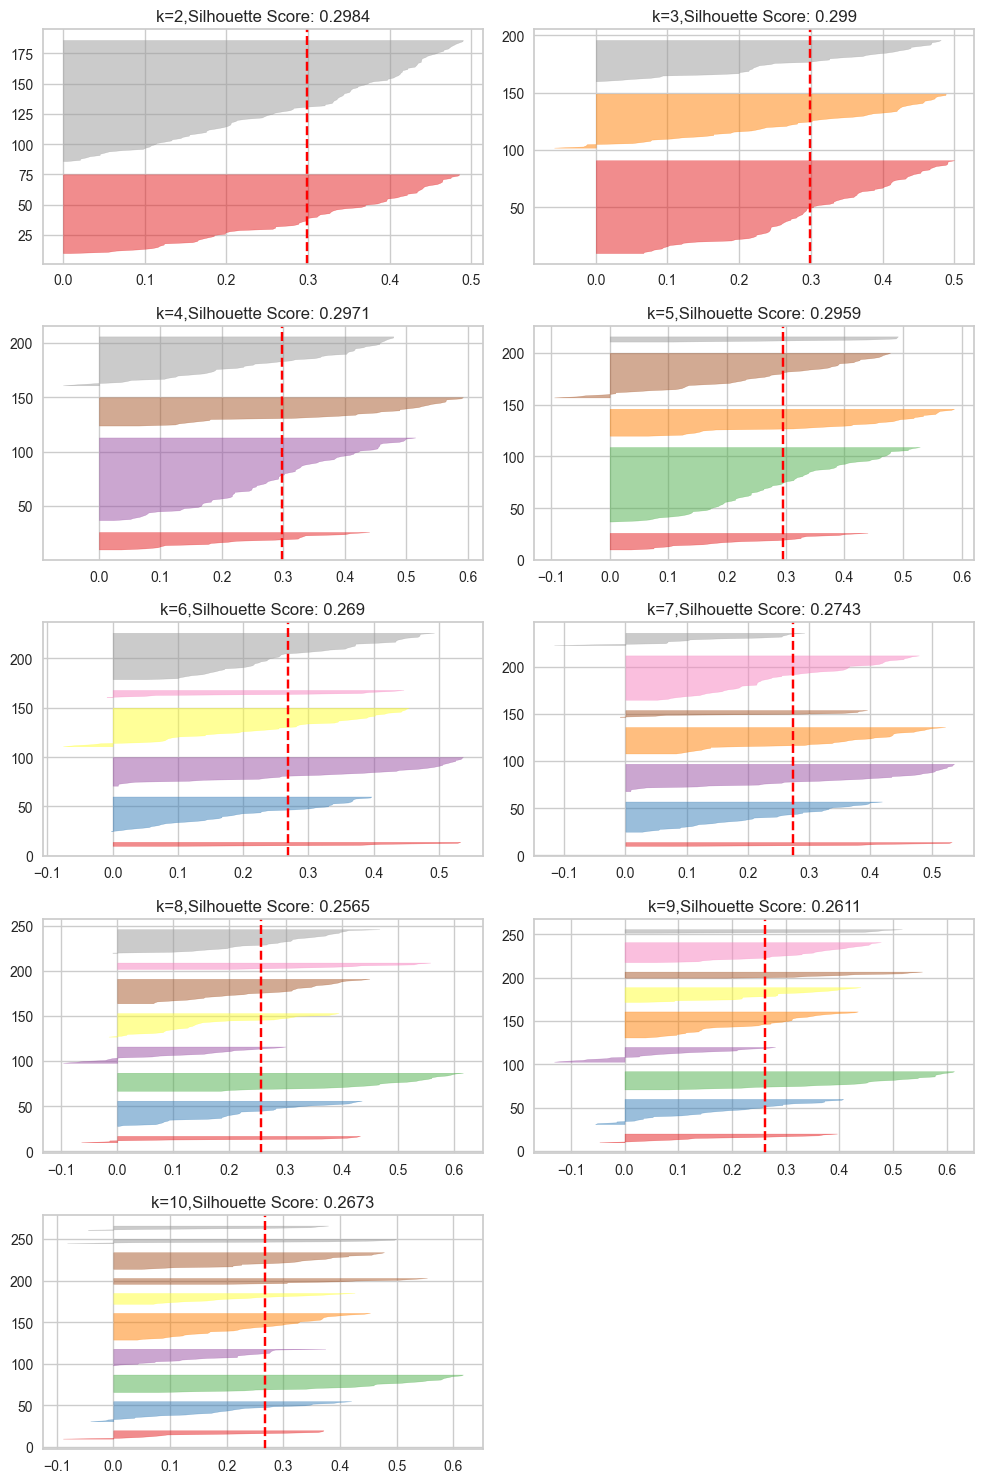

In [34]:
# To determine the optimal number of clusters (k) in K-Means, we use the silhouette score and visualizer. 
# The best k is chosen where the silhouette score is highest, indicating well-separated and compact clusters.
t = 1
plt.figure(figsize = (10,15))
for i in range(2,11):
    plt.subplot(5,2,t)
    model = KMeans(n_clusters=i,random_state = 0)
    sil_viz = SilhouetteVisualizer(model) 
    sil_viz.fit(pca_data)
    plt.title(f'k={i},Silhouette Score: {round(sil_viz.silhouette_score_,4)}')
    t+=1
plt.tight_layout()
plt.show()

#### Conclusion
Since k=3 has the highest silhouette score and forms well-balanced clusters with minimal outliers, we select k=3 as the optimal number of clusters.

### Implementation of Kmeans Clustering on PCA data - Model Building

In [37]:
# Building the K-Means model with k=3 to segment the data into three distinct clusters based on socio-economic and health factors.
kmeans_model = KMeans(n_clusters=3,random_state= 0)
kmeans_model.fit(pca_data)

KMeans(n_clusters=3, random_state=0)

In [38]:
#Label the data with predicted cluster
pred=kmeans_model.predict(pca_data)
pca_data['labels']=pred
pca_data.head()

PC1       PC2       PC3       PC4       PC5  labels
country                                                                      
Afghanistan         -3.099217 -0.232689 -0.972447  0.787536 -0.009905       1
Albania              0.427427 -0.285346 -0.242571 -1.377388  0.114011       0
Algeria             -0.411658 -0.526613  1.634043 -0.613283  0.459962       0
Angola              -3.217072  1.229145  1.983955  1.635771  0.159702       1
Antigua and Barbuda  1.189011  0.479460 -0.151955 -0.774114 -0.382475       0

In [61]:
# Centroids of the clusters
centroids=kmeans_model.cluster_centers_
print(f'The centroids of the clusters are {centroids}')

The centroids of the clusters are [[ 0.18789482  0.09749425  0.18668634 -0.74790798  0.18934052]
 [-2.5308199   0.10840405 -0.20904521  0.63748954 -0.14282851]
 [ 2.86681026 -0.35670063 -0.14254351  0.83051233 -0.23432848]]


### Visualize the clusters

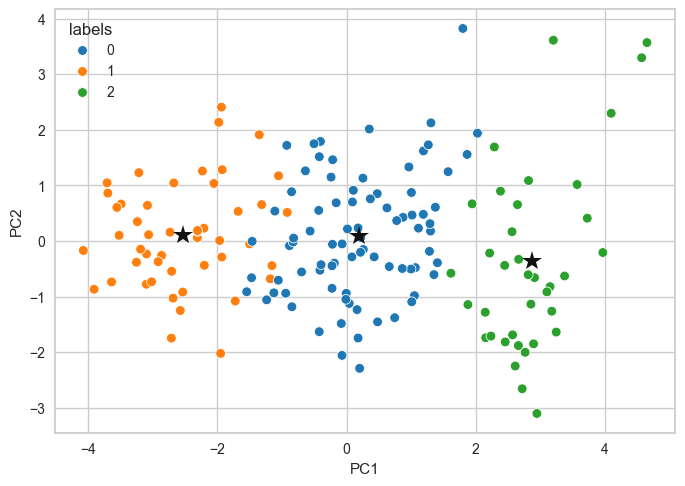

In [137]:
# Visualizing the K-Means clusters in a 2D PCA space, with distinct colors for each cluster and centroids marked to highlight cluster centers
sns.scatterplot(pca_data,x='PC1',y='PC2',hue='labels',palette='tab10')
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker='*',ms=15,color='k')
plt.show()

## Business interpretation


In [139]:
# Appending the cluster labels from K-Means to the original dataset to analyze patterns and characteristics of each cluster
df['labels']=pred
df.head()

child_mort  exports  health  imports   income  inflation  \
country                                                                         
Afghanistan                90.2     10.0    7.58     44.9   1610.0       9.44   
Albania                    16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria                    27.3     38.4    4.17     31.4  12900.0      16.10   
Angola                    119.0     62.3    2.85     42.9   5900.0      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0       1.44   

                     life_expec  total_fer     gdpp  labels  
country                                                      
Afghanistan                56.2       5.82    553.0       1  
Albania                    76.3       1.65   4090.0       0  
Algeria                    76.5       2.89   4460.0       0  
Angola                     60.1       6.16   3530.0       1  
Antigua and Barbuda        76.8       2.13  12200.0       0

In [143]:
# Calculating the mean values of socio-economic and health factors for each cluster to interpret the characteristics and differences among them.
df.groupby(by = 'labels').mean()

child_mort    exports    health    imports        income  inflation  \
labels                                                                        
0        21.508537  40.797317  6.231951  48.097561  12281.097561   7.365720   
1        91.570833  28.546229  6.296458  41.443040   3937.770833  10.345729   
2         5.237838  52.458108  8.730541  47.971622  41360.540541   2.588432   

        life_expec  total_fer          gdpp  
labels                                       
0        72.875610   2.311707   6291.146341  
1        59.558333   4.953958   1902.916667  
2        79.956757   1.755676  34073.243243

Based on the mean values of socio-economic and health factors, we can categorize the clusters as follows:

**Cluster 0 (Developing Nations)**

* Moderate child mortality (21.5) and fertility rate (2.31)
* Moderate income (~ 12,281) and GDP per capita (~ 6,291)
* Life expectancy (~72.9 years) indicates decent healthcare
* Inflation (~7.36%) is manageable
* Countries in this cluster are developing, with improving health and economic conditions.

**Cluster 1 (UnderDeveloped Nations - High Priority for Aid)**

* High child mortality (91.6) and high fertility rate (4.95)
* Low income (~ 3,938) and GDP per capita (~ 1,902)
* Lower life expectancy (~59.6 years) indicates poor healthcare
* High inflation (~10.35%), which may indicate economic instability
* These countries have struggling economies and weak healthcare systems, making them the top priority for HELP International’s aid efforts.

**Cluster 2 (Developed Nations)**
* Very low child mortality (5.2) and low fertility rate (1.75)
* High income (~ 41,361) and GDP per capita (~ 34,073)
* High life expectancy (~80 years) suggests advanced healthcare
* Low inflation (~2.59%), indicating economic stability
* These are high-income, developed nations with strong economies and good healthcare systems, meaning they do not require immediate aid.

Conclusion:

HELP International should focus aid efforts on Cluster 1, where countries face severe health and economic challenges. Cluster 0 may need some support, but Cluster 2 is economically stable and does not require assistance.

In [159]:
#Replacing the labels with classifiers
df['labels']=df['labels'].map({0:'Developing',1:'Underdeveloped',2:'Developed'})

In [161]:
df.head(3)

child_mort  exports  health  imports   income  inflation  \
country                                                                 
Afghanistan        90.2     10.0    7.58     44.9   1610.0       9.44   
Albania            16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria            27.3     38.4    4.17     31.4  12900.0      16.10   

             life_expec  total_fer    gdpp          labels  
country                                                     
Afghanistan        56.2       5.82   553.0  Underdeveloped  
Albania            76.3       1.65  4090.0      Developing  
Algeria            76.5       2.89  4460.0      Developing

In [171]:
#Developed countries
print('The following countries are classified as developed:',df[df['labels']=='Developed'].index, sep = '\n')

The following countries are classified as developed:
Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')


In [173]:
#Developing countries
print('The following countries are classified as developed:',df[df['labels']=='Developing'].index, sep = '\n')

The following countries are classified as developed:
Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles',
       'Solomon Islands', 'Sri Lanka', 'St. Vincent an

In [175]:
#Underdeveloped countries
print('The following countries are classified as developed:',df[df['labels']=='Underdeveloped'].index, sep = '\n')

The following countries are classified as developed:
Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar',
       'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype='object', name='country')


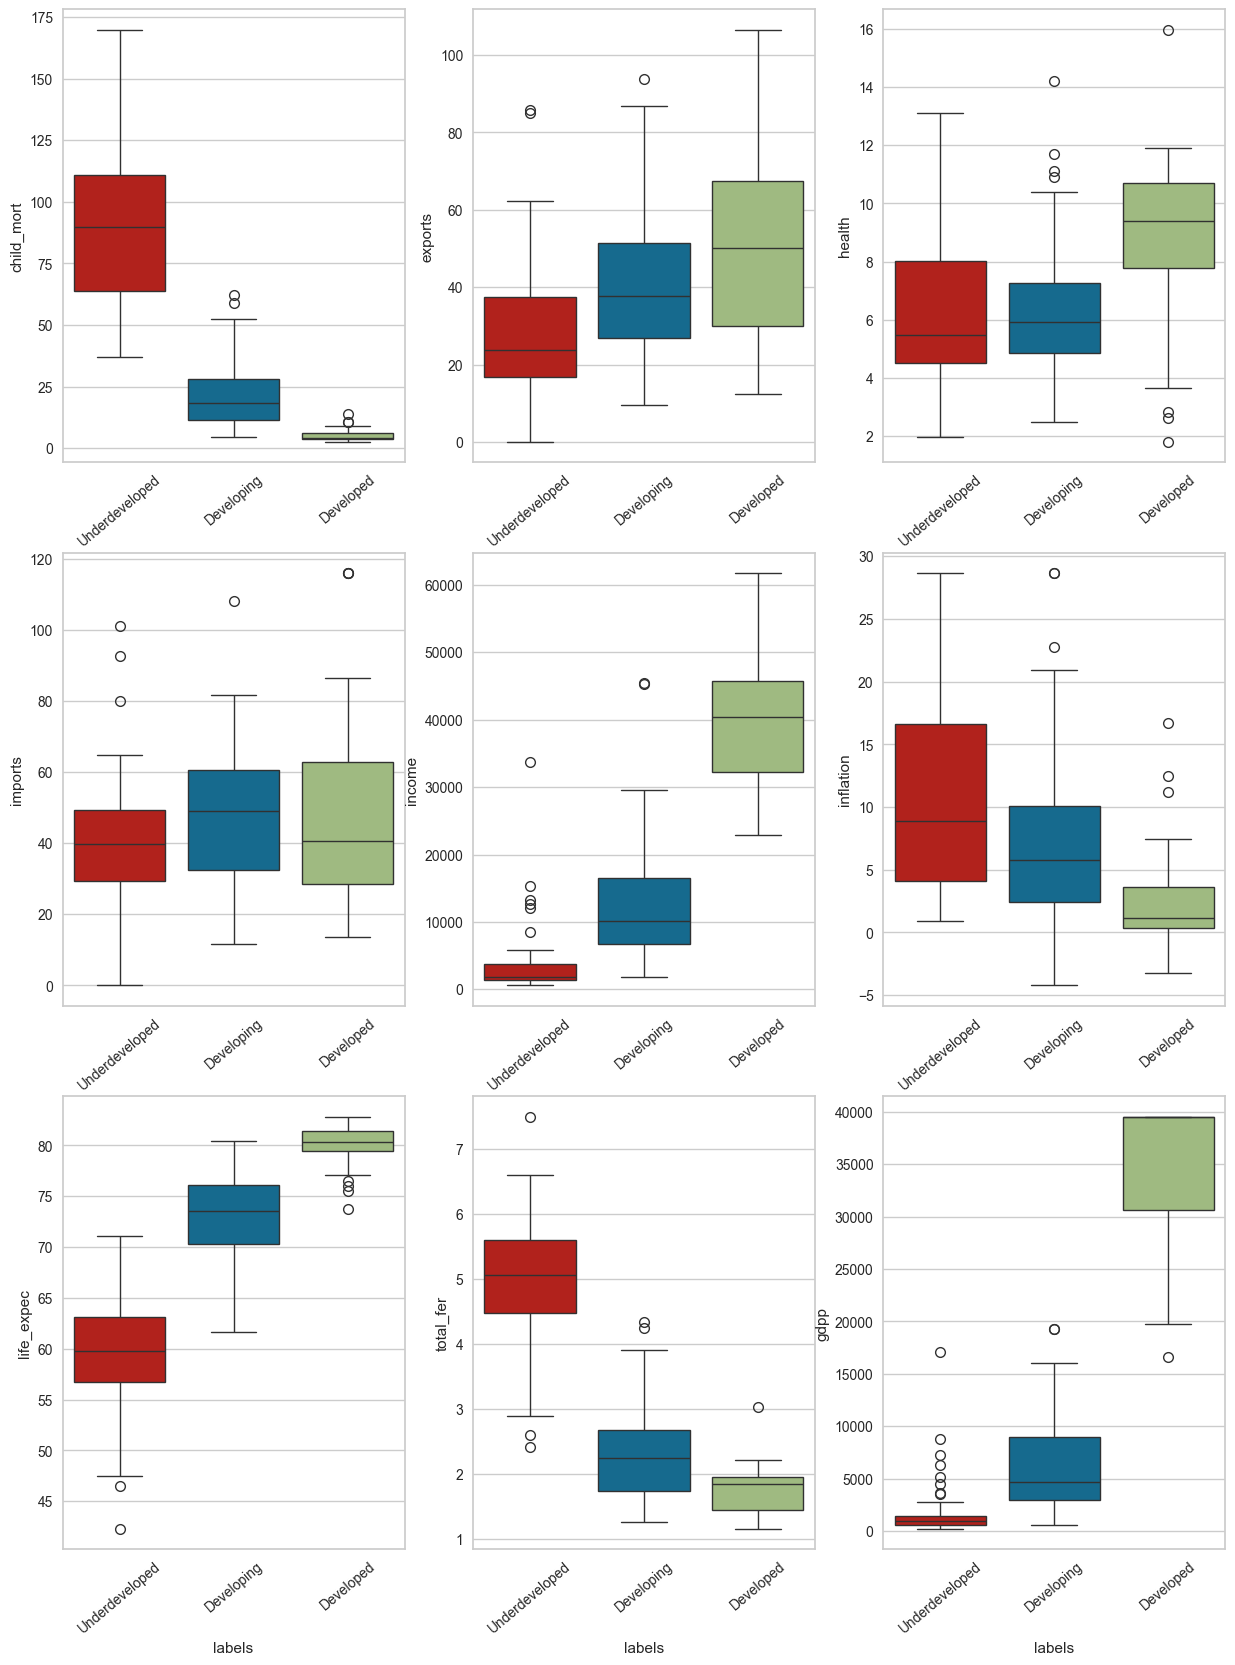

In [189]:
# Visualizing the distribution of numerical features across different clusters to analyze variations in socio-economic and health indicators. 
# This helps in understanding how each cluster differs in terms of spread, central tendency, and the presence of outliers.
t =1 
plt.figure(figsize = (15,20))
for i in df.select_dtypes(np.number).columns:
    plt.subplot(3,3,t)
    sns.boxplot(x= df['labels'], y =df[i], palette = ['r','b','g'])
    plt.xticks(rotation = 40)
    t +=1
plt.tight_layout
plt.show()

In [ ]:
# as we can gdp,income,child_mort,life_expec are clear the indicator that ceo should focus the  underdeveloped country that they more funds

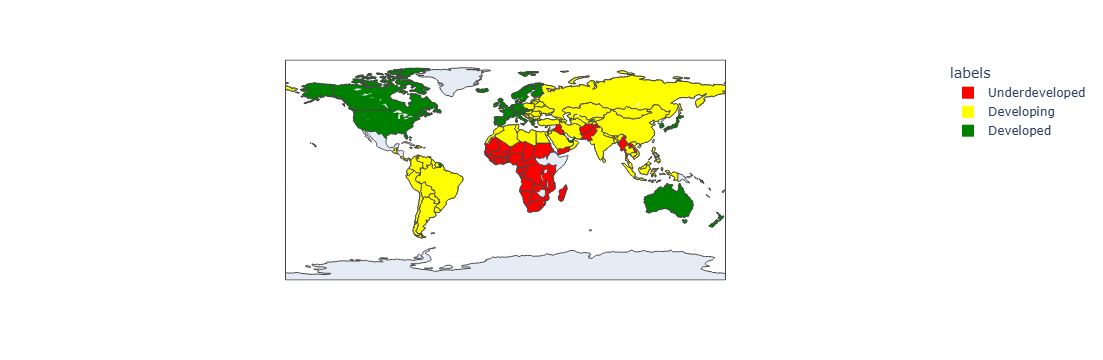

In [191]:
# Mapping the categorized countries on a world map to provide a geographic visualization of the clusters, 
# helping to identify regional patterns and areas that require aid.
px.choropleth(data_frame=df,locationmode='country names',locations=df.index,color='labels',
              color_discrete_map={'Underdeveloped':'red','Developed':'green','Developing':'yellow'})

### Deployment

In [194]:
#Create a pickle of Fitted model
import pickle
with open('final_model.pkl','wb') as file:   
    pickle.dump(kmeans_model,file)

In [196]:
#Create a pickle of Standard scaler
with open('scaler.pkl','wb') as file: 
    pickle.dump(ss,file)
#Create a pickle of PCA
with open('pca.pkl','wb') as file:  
    pickle.dump(pca_final,file)